<a href="https://colab.research.google.com/github/Meghanah97/Individual_project_bike_sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size="+3" color='#053c96'><b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b></font>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#<font size="+3" color='#053c96'><b> The Structure of this notebook</b></font>

#**Project Work flow**

---

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion

---
##<font size="+2" color='#053c96'><b> Installing and Importing Libraries</b></font>

### Libraries used in this Project:

Datawrangling : 
* Numpy
* Pandas

For Graphing : 
* Matplotib
* Seaborn 

Machine learning :
* Scikit-Learn
* SK-Opt
* XGBoost
* CatBoost

Miscellaneous :
* Google colab tools

# Importing few libraries

In [117]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  log_loss

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [118]:
bike_df=pd.read_csv('/content/SeoulBikeData.csv',encoding='latin')

In [119]:
#data copy
data=bike_df.copy()

<b> <font size="+3" color='#053c96'><b> Dataset Information: </b></font>

In [120]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [121]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [122]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [123]:
data.describe(percentiles = [.25,.50,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,2043.000,2526.23,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,22.000,23.00,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,30.700,35.10,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,94.000,97.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,3.700,4.70,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.000,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,22.405,24.70,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,2.560,3.17,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,0.400,4.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,0.200,2.50,8.80


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#**Data Preprocessing and Feature Engineering**

# Formatting Datetime type:

In [125]:
# importing Datetime
from datetime import datetime
import calendar
# Setting the Datetime formate: 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2022-12-21'

In [126]:
data['Date']=data['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [127]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day_name()

In [128]:
#creating a new column of weekend_weekdays and dropping unnecessary columns
data['weekdays_weekend']=data['day'].apply(lambda x :1 if x=='Saturday' or x=='Sunday' else 0)
data=data.drop(columns=['Date','day','year'],axis=1)

In [129]:
data['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [130]:
#checking unique values
data.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

In [131]:
#checking duplicate value
Dup=len(data[data.duplicated()])
print("Number of duplicate value is=",Dup)

Number of duplicate value is= 0


In [132]:
#checking null values
data.isna().sum()
data.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
weekdays_weekend             0
dtype: int64

# Changing Data type:

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [134]:
cols=['Hour','month','weekdays_weekend']
for i in cols:
  data[i]=data[i].astype('category')

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [136]:
#renaming column names
data=data.rename(columns={'Rented Bike Count':'Rented_bike_count',
                                'Humidity(%)':'Humidity',
                                'Temperature(°C)':'Temperature',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_day'})

#**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

#**Univariate Analysis**

 Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable

#**Analysis of dependent variables**

A dependent variable is the variable that changes as a result of the independent variable manipulation. It's the outcome you're interested in measuring, and it “depends” on your independent variable. In statistics, dependent variables are also called: Response variables (they respond to a change in another variable)

#**Analysis of categorical variables**

Categorical data analysis is the analysis of data where the response variable has been grouped into a set of mutually exclusive ordered (such as age group) or unordered (such as eye color) categories.

##**Visualization**

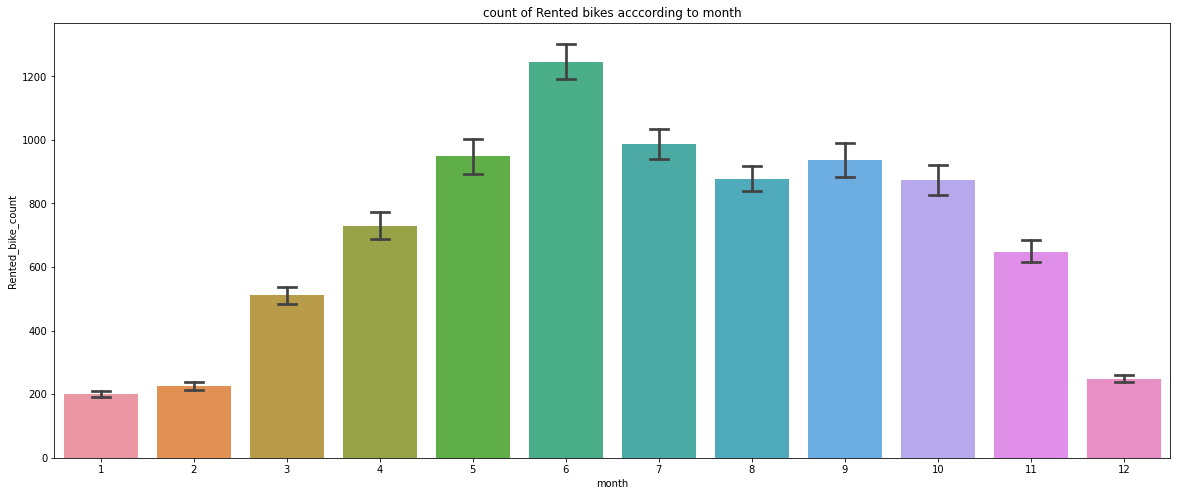

In [137]:
#month
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='month',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to month');

# Comment
From barplot we can say that month 5 to 10 the demand of the rented bike is high and these months comes between summer season.

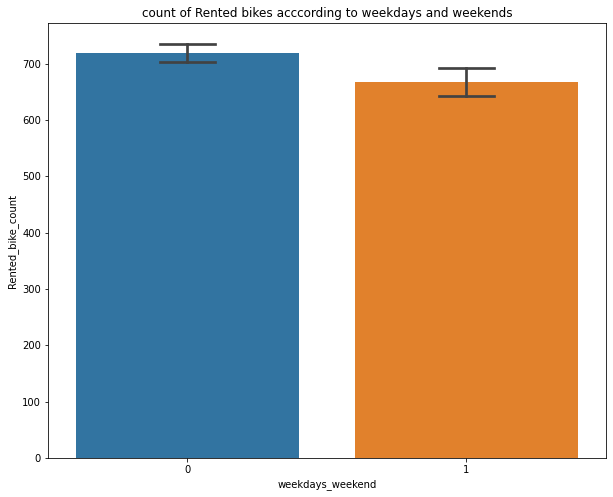

In [138]:
#week and weekends
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='weekdays_weekend',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to weekdays and weekends');

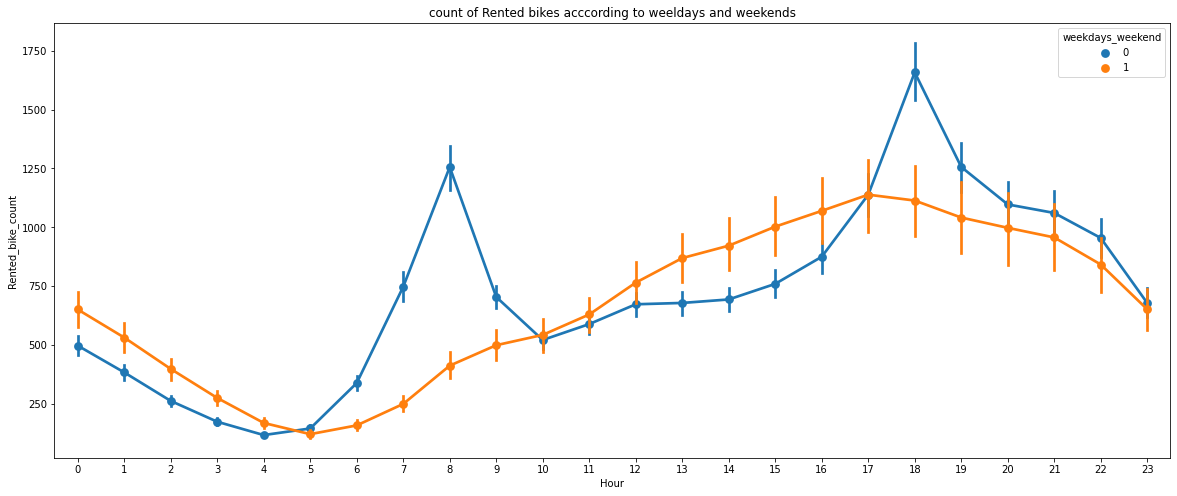

In [139]:
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_bike_count',hue='weekdays_weekend',ax=ax)
ax.set(title='count of Rented bikes acccording to weeldays and weekends');

# comment
From above plots we can say that in weekdays which represents blue color ,the demand of bike are higher and even higher between 7am to 9am and 5pm to 7pm. The orange color represents the weekend days, and it show that demand of rented bikes are low in morning hour but after 4pm demand slightly increases.

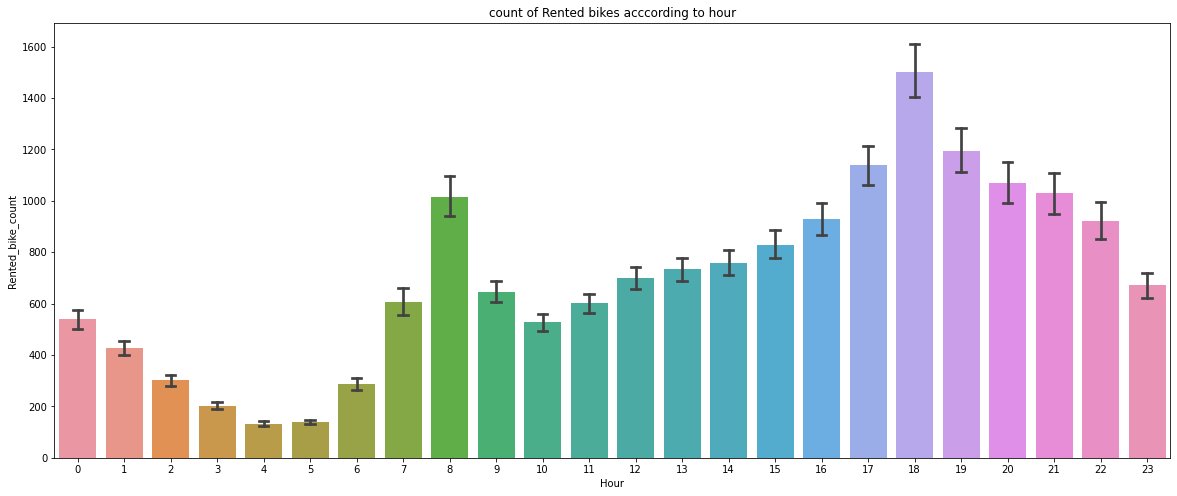

In [140]:
#hour
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Hour',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to hour');

# comment
From above plot we can say that use of rented bike between 7am to 9am and 5pm to 7pm

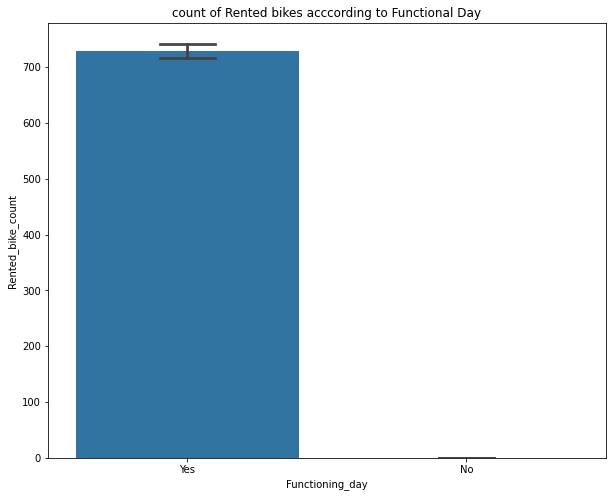

In [141]:
#functiona day
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='Functioning_day',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to Functional Day');

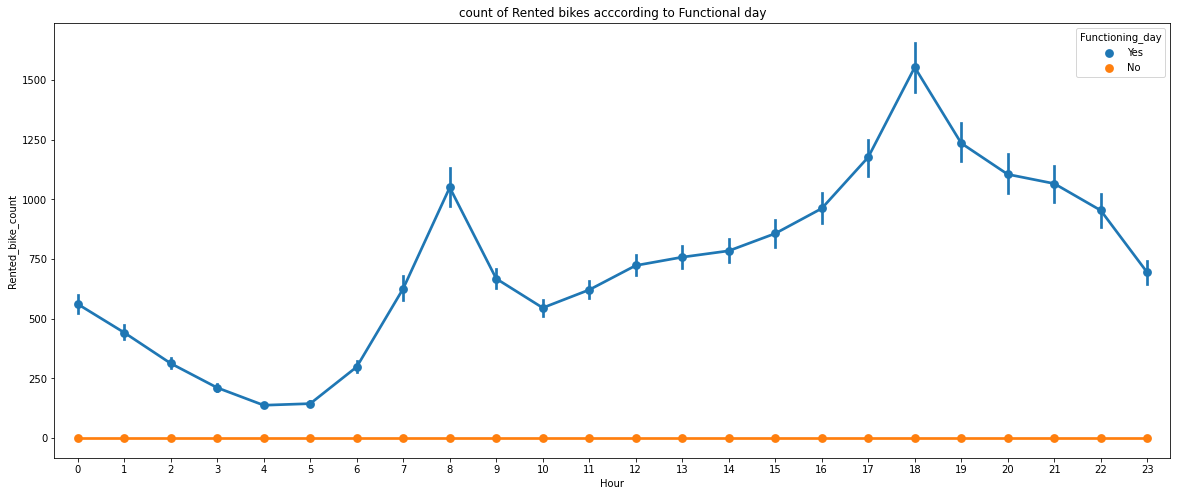

In [142]:
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_bike_count',hue='Functioning_day',ax=ax)
ax.set(title='count of Rented bikes acccording to Functional day');

# comment
From above plot it shows that use of rented bike in functioning day or nt ,people dont use rented bikes in non-functioning day

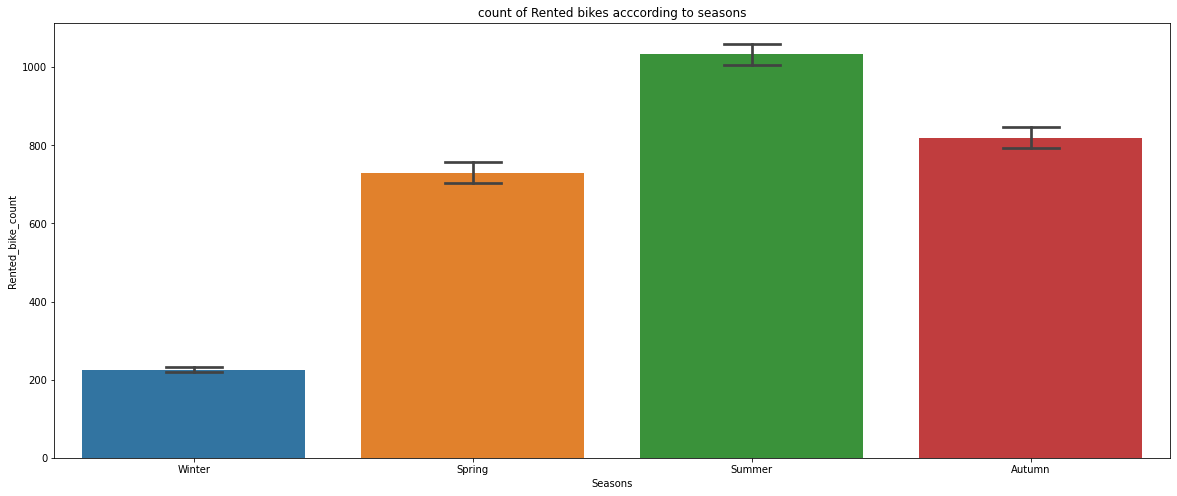

In [143]:
#Seasons
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Seasons',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to seasons');

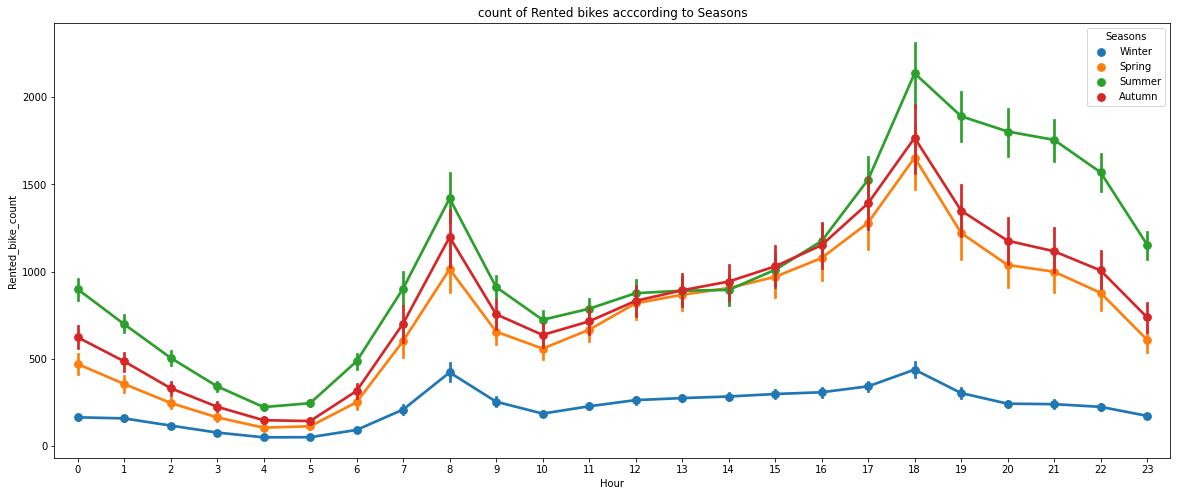

In [144]:
#aanlyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_bike_count',hue='Seasons',ax=ax)
ax.set(title='count of Rented bikes acccording to Seasons');

# comment
From above plot it shows use of rented bike in all four season,in summer season use of rented bike is more likely between 7am to 9am and 7pm to 5pm, In winter season use of rented bike is very low due to rain and snowfall

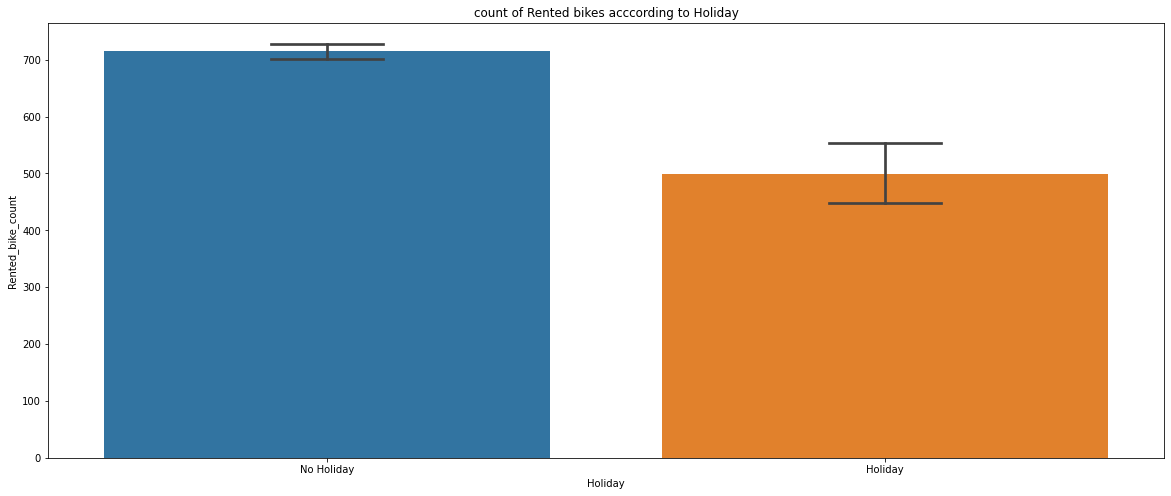

In [145]:
#Holiday
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Holiday',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to Holiday');

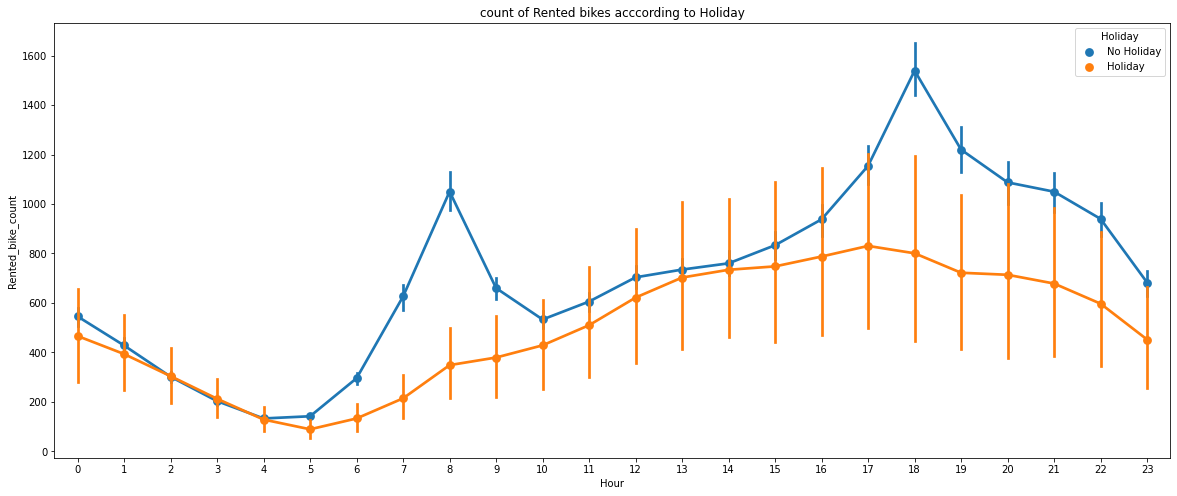

In [146]:
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_bike_count',hue='Holiday',ax=ax)
ax.set(title='count of Rented bikes acccording to Holiday');

# comment
From the above plot shows that use of rented bikes in holidays, we can say that use of rented bike between 2pm to 8pm

# Analyze Numerical variables

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [148]:
Numerical_columns=list(data.select_dtypes(['int64','float']).columns)
Numerical_features=pd.Index(Numerical_columns)
Numerical_features

Index(['Rented_bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

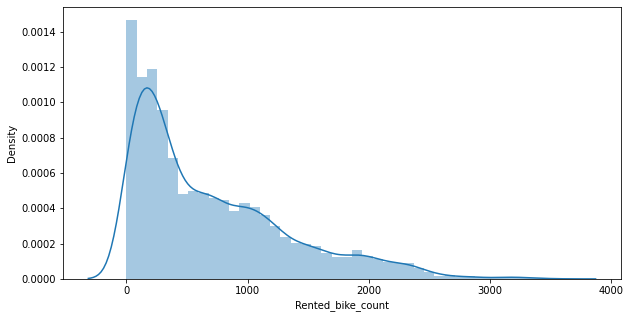

In [149]:
plt.figure(figsize=(10,5))
sns.distplot(data['Rented_bike_count']);

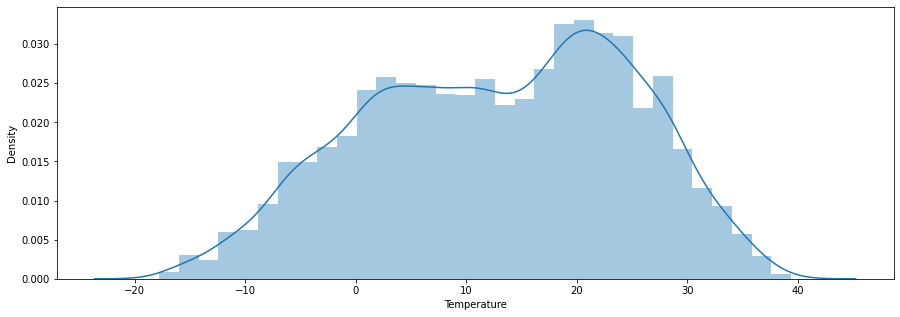

In [150]:
plt.figure(figsize=(15,5))
sns.distplot(data['Temperature']);

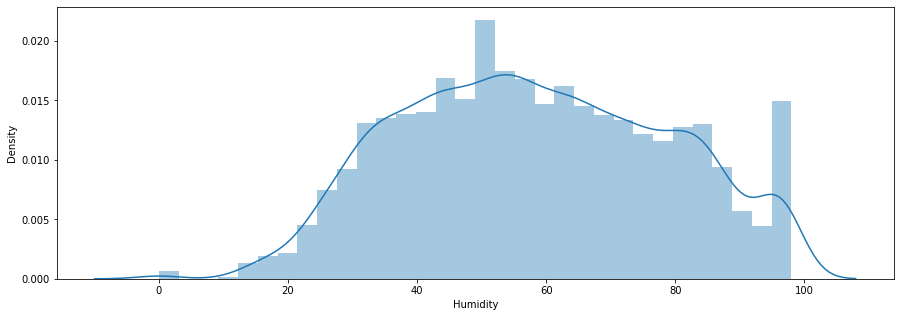

In [151]:
plt.figure(figsize=(15,5))
sns.distplot(data['Humidity']);

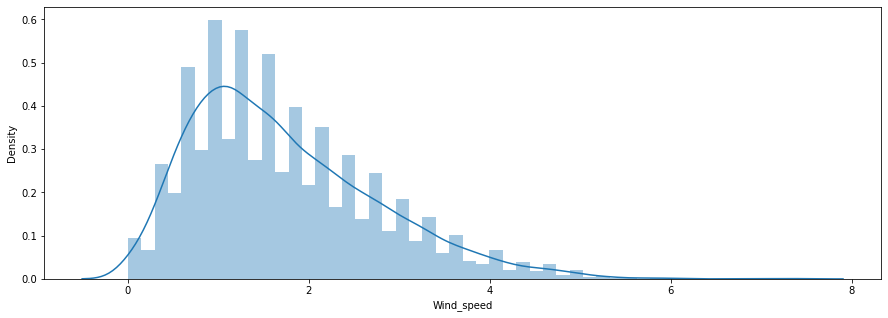

In [152]:
plt.figure(figsize=(15,5))
sns.distplot(data['Wind_speed']);

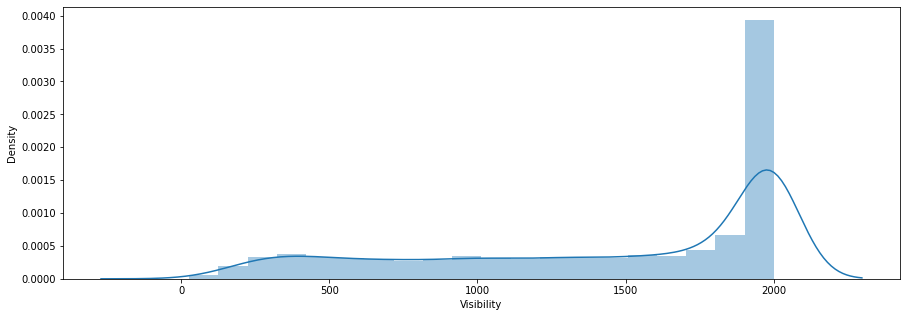

In [153]:
plt.figure(figsize=(15,5))
sns.distplot(data['Visibility']);

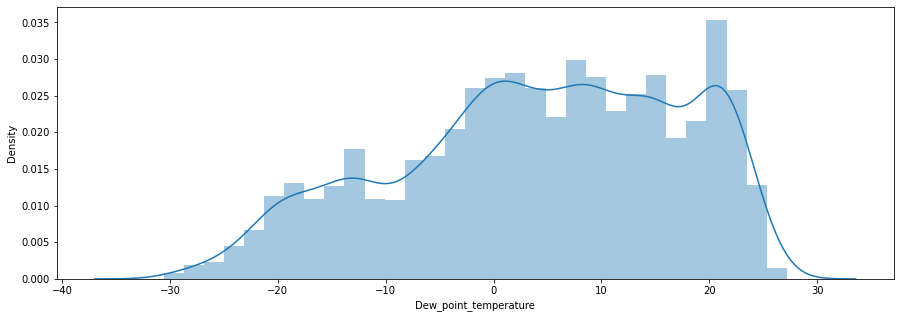

In [154]:
plt.figure(figsize=(15,5))
sns.distplot(data['Dew_point_temperature']);

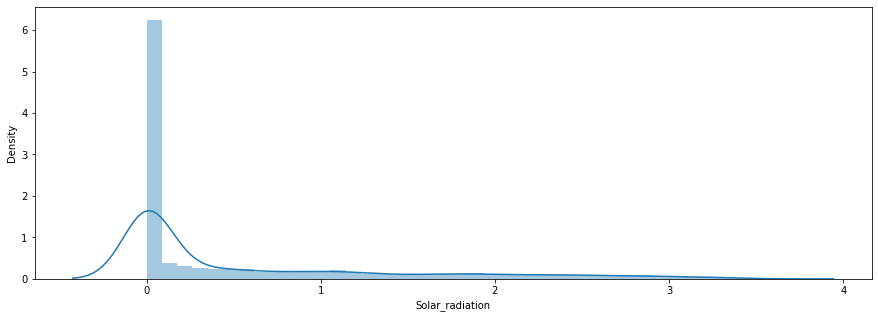

In [155]:
plt.figure(figsize=(15,5))
sns.distplot(data['Solar_radiation']);

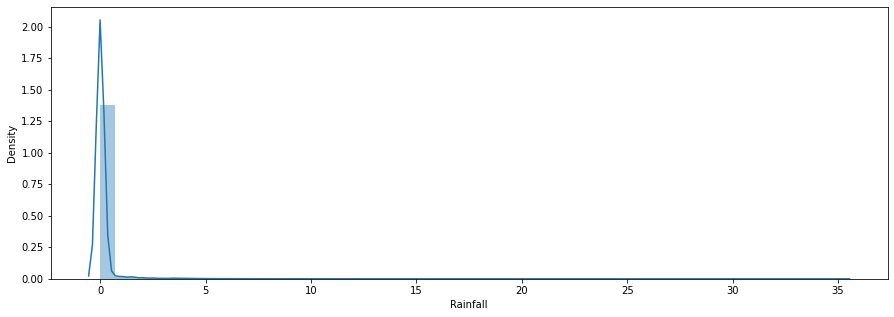

In [156]:
plt.figure(figsize=(15,5))
sns.distplot(data['Rainfall']);

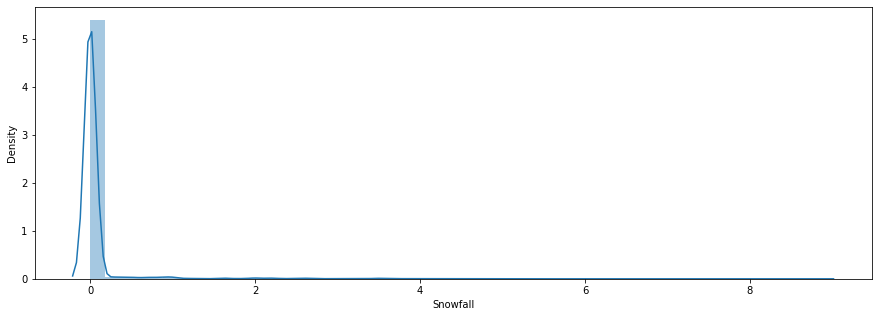

In [157]:
plt.figure(figsize=(15,5))
sns.distplot(data['Snowfall']);

# Bivariate analysis

Bivariate analysis means the analysis of bivariate data. It is one of the simplest forms of statistical analysis, used to find out if there is a relationship between two sets of values. ategorized as Correlation coefficient, Scatter plot, Regression analysis.

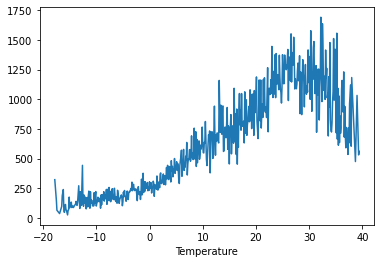

In [158]:
data.groupby('Temperature').mean()['Rented_bike_count'].plot();

From the above plot we see that people like to ride bikes when it i9s pretty hot around 25'C 

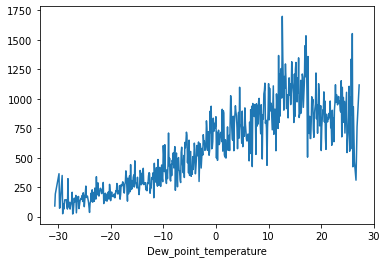

In [159]:
data.groupby('Dew_point_temperature').mean()['Rented_bike_count'].plot();

From the above plot we can see that people tend to use rented bike when there is a solar radiation

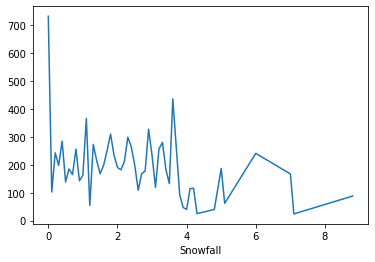

In [160]:
data.groupby('Snowfall').mean()['Rented_bike_count'].plot();

we can see that plot ,amount of rented bikes are very low when there 4cm snow ,on that time bikes rents much lower

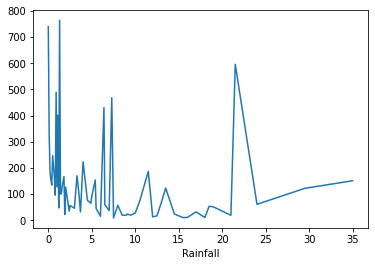

In [161]:
data.groupby('Rainfall').mean()['Rented_bike_count'].plot();

we can see that even there is a rain demand for rented bikes not decreased, for example even with 20mm rain there is big peak of rented bikes.

# Regression plot

Regression analysis is a statistical method that shows the relationship between two or more variables. Usually expressed in a graph, the method tests the relationship between a dependent variable against independent variables

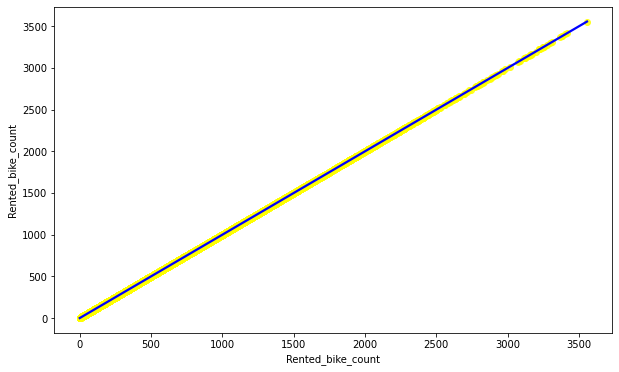

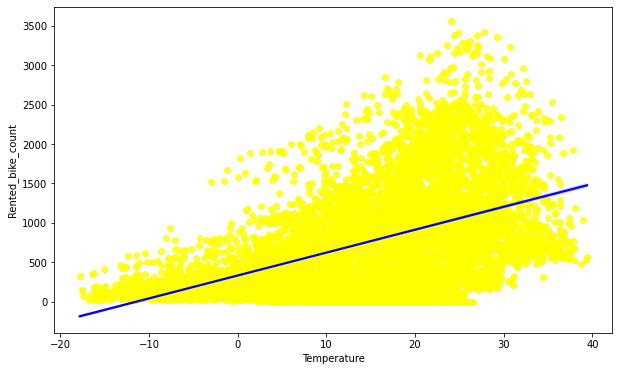

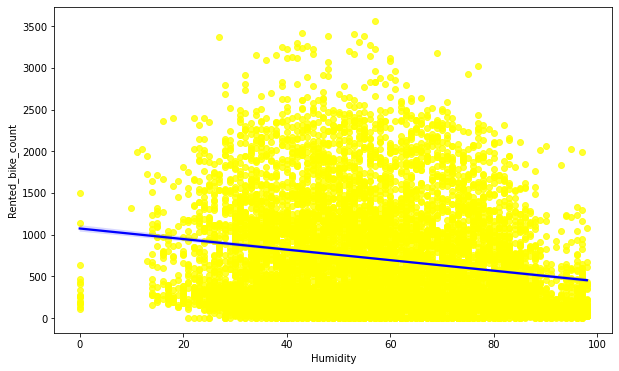

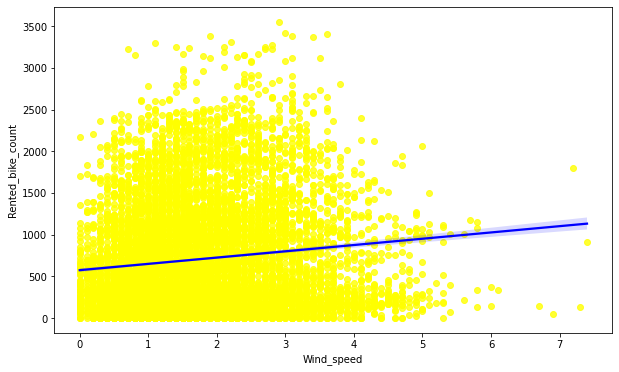

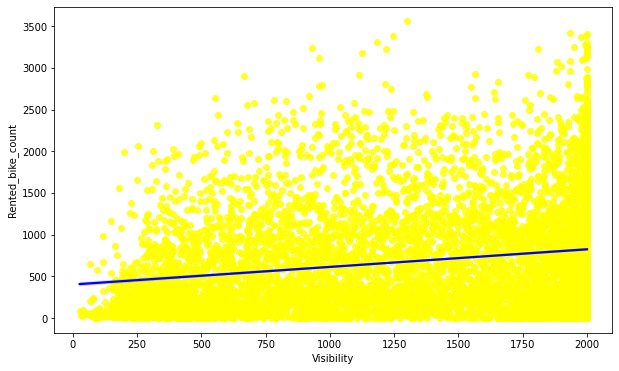

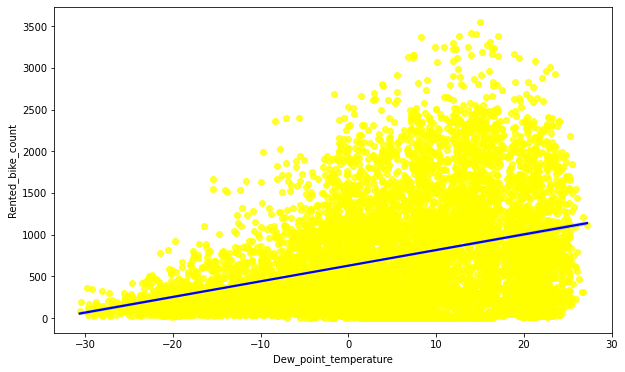

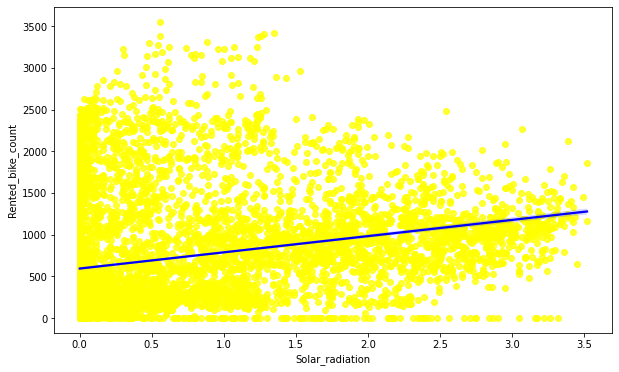

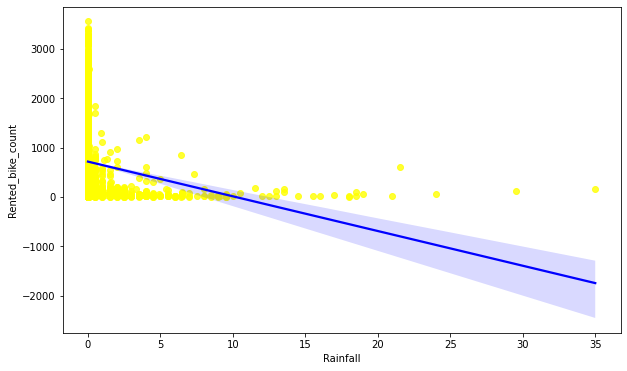

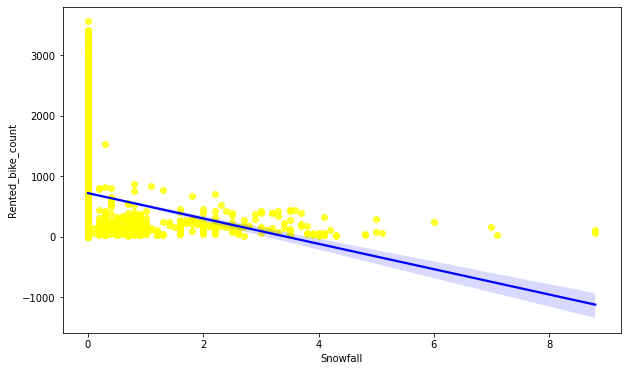

In [162]:
#printing regression plot for all numerical values
for j in Numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[j],y=data['Rented_bike_count'],scatter_kws={"color":"yellow"},line_kws={"color":"blue"})

From the above plot we can nsee that numerical features like Temperature,Wind_speed, Visibility,Dew_point_temperature,Solar_radiation are positively related to target variable(rented bike count increase with increase of thses features). some features like Rainfall,Snowfall,Humidity are negatively relted with target variables(bike count decreases with these feature increase)  

# Normalise Rented_bike_count column

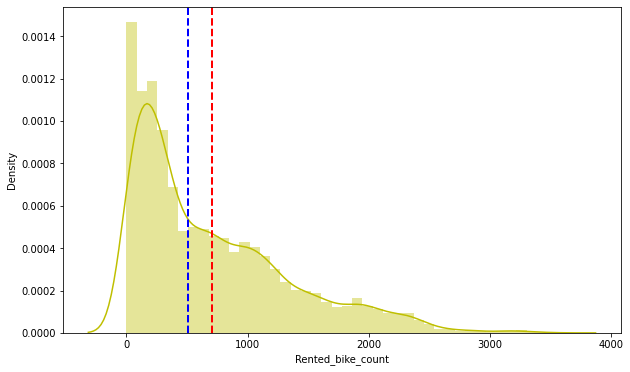

In [163]:
plt.figure(figsize=(10,6))
plt.xlabel("Rented_bike_count")
plt.ylabel("Density")
ax=sns.distplot(data['Rented_bike_count'],hist=True,color='y')
ax.axvline(data['Rented_bike_count'].mean(),color='red',linestyle='dashed',linewidth=2)
ax.axvline(data['Rented_bike_count'].median(),color='blue',linestyle='dashed',linewidth=2)
plt.show()

we can see that bike count is slightly right skewed.consideringin linear regression distribution of dependend variables has to be normal, it needs to be fixed.

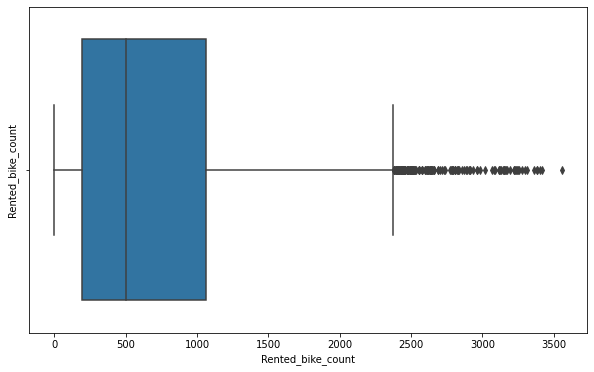

In [164]:
#checking for outlier
plt.figure(figsize=(10,6))
plt.ylabel('Rented_bike_count')
sns.boxplot(x=data["Rented_bike_count"])
plt.show()

we can see there is a outlier

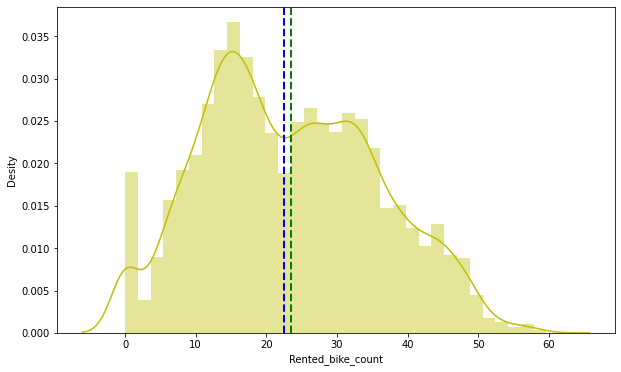

In [165]:
#applying Square root to rented bike count to improve skewness
plt.figure(figsize=(10,6))
plt.xlabel('Rented bike count')
plt.ylabel('Desity')
ax=sns.distplot(np.sqrt(data['Rented_bike_count']),color='y')
ax.axvline(np.sqrt(data['Rented_bike_count']).mean(),color='green',linestyle='dashed',linewidth=2)
ax.axvline(np.sqrt(data['Rented_bike_count']).median(),color='blue',linestyle='dashed',linewidth=2)
plt.show()

we can see this is almost normal distribution after skewing operation

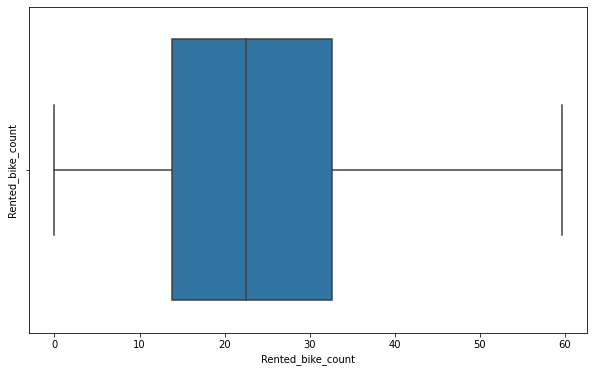

In [166]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented_bike_count')
sns.boxplot(x=np.sqrt(data["Rented_bike_count"]))
plt.show()

In [167]:
data.corr()

,Rented_bike_count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
Rented_bike_count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# **Checking correlation between variables**

# Checking in OlS Model
ordinary least squares (OLS) is a type of linear least squares method for choosing the unknown parameters in a linear regression model (with fixed level-one effects of a linear function of a set of explanatory variables) by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the input dataset and the output of the (linear) function of the independent variable


In [168]:
data.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [169]:
import statsmodels.api as sm
X=data[['Temperature','Humidity','Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_radiation', 'Rainfall',
       'Snowfall']]
Y=data['Rented_bike_count'] 
data.head()      

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [170]:
#add constant value
X=sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [171]:
#fit a OLS model
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_bike_count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:16:25   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square and Adj square are near to each other, 40% of variance in the rested bike count is explained by model, for F statistics,P value is less than 0.05 for 5% level of significance.P value of dew point temp and visibility are very high and they are not significant. Omnibus tests the skewness and kurtosis of the residuals. here the value of Omnibus is high, it shows we have skewness in our data. the condition number is large , 3.11e+04. this might indicate that there are strong multicollinearity or other numerical problems, Durbin_watson testd for autocorrelation of residuals. here value is less than 0.5. we can say there exists a positive auto correlation among the variables.

In [172]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


From OlS Model we see that Temperature and Dewpointtemperature are highly correlated, so we need drop one among them, for that we check (P>|t|) value and we can see that dewpointtemperature value is higher so we can drop dewpointtemperature column.  

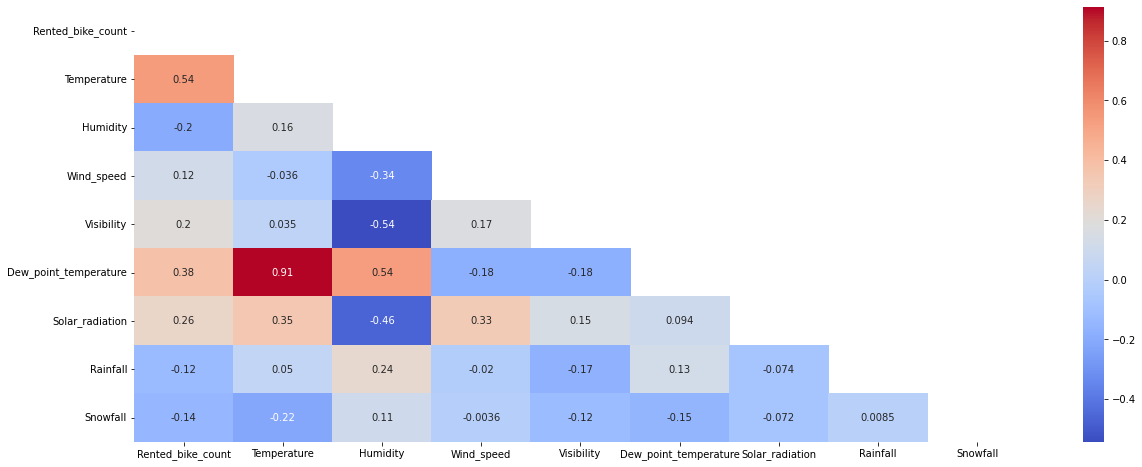

In [173]:
#heatmap
plt.figure(figsize=(20,8))
correlation=data.corr()
mask=np.triu(np.ones_like(correlation,dtype=bool))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

we can see that target variable line the most positively correlted variables to the rent are as follows: Temperature, Dewpointtemperature, Solarradiation and some negatively correlated are: Humidity, Rainfall
we can see that positive correlation between columns Temperature and Dewpointtemperature is 0.91 so even if we drop this column then it doesnt affect outcome, so we can drop dewpointtemperature.

In [174]:
data=data.drop(["Dew_point_temperature"],axis=1)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_bike_count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


# Create Dummy Variables

 Generally, a dummy variable is a placeholder for a variable that will be integrated over, summed over, or marginalized. However, in machine learning, it often describes the individual variables in a one-hot encoding scheme.

In [176]:
categorical_features=list(data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

**Doing one hot encoding using get_dummies function.**

In [177]:
#one hot encoding
data1=data
def one_hot_encoding(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
    data=data.drop([column],axis=1)
    return data
for i in categorical_features:
  data1=one_hot_encoding(data1,i)
data1.head()   

,Rented_bike_count,Temperature,Humidity,Wind_speed,Visibility,Solar_radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


## **Model Training**

# Train Test split for regression
The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

* Train Dataset: Used to fit the machine learning model.
* Test Dataset: Used to evaluate the fit machine learning model.

In [178]:
X=data1.drop(columns=['Rented_bike_count'],axis=1)
Y=np.sqrt(data1['Rented_bike_count'])
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [179]:
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_bike_count, dtype: float64

In [180]:
#Creeting test train data
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [181]:
data1.describe().columns

Index(['Rented_bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

The mean squared error tells how close a regression line is to a set of points and does that by taking the distance from the points to the regression line and squaring them.
MSE formula
### $$MSE =(1/n) \sum(actual-forecast)2$$
n= number of items
∑=summation notation
actual=original /observed y value
forecast=y value from regression
Root Mean SQuare error(RMSE) is the standard deviation of the residuals(i.e., prediction error).
Mean Bsolute Error(MAE) are metrics used to evaluste a regression model... Here error are the diffrences between the predicted and actaual value
R-Squared(R2) is a statistical measure that represents the proportion of variables for a dependent variable for a dependent variable thats exaplained by an independent variable or variables in regression model.
formula for R2
### $$R2=1-(Unexplained variation)/(Total Variation)$$
R2=1-Total variation unexaplianed variation\
Adjusted R-Squared is modified version of R_squared that has been adjusted for the number of predictors in the model.


## **Linear Regression**

 Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.
 $$Y pred = \beta_0+\beta_1X$$
 where 
$$ \beta_0 and \beta_1 $$ are slopes and intercepts
In case of multiple features the formula translates into:
$$Y\_pred= \beta_0 + \beta_1X_1 + ... + \beta_pX_p$$
where
$$ X_1,X_2 $$etc are feature values and  $$ \beta_0 and \beta_1 $$ are weight assigned to these values.\
Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks.  Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates. Until the function is close to or equal to zero, the model will continue to adjust its parameters to yield the smallest possible error. Once machine learning models are optimized for accuracy, they can be powerful tools for artificial intelligence (AI) and computer science applications.

let us begin with our first model

In [182]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression().fit(X_train,Y_train)

In [183]:
regr.score(X_train,Y_train)

0.7722101548255267

In [184]:
regr.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [185]:
#get values
Y_pred_train=regr.predict(X_train)
Y_pred_test=regr.predict(X_test)

In [186]:
from sklearn.metrics import mean_squared_error
MSE_lr=mean_squared_error((Y_train),(Y_pred_train))
print("MSE:",MSE_lr)

#calc RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE:",RMSE_lr)
#calc MAE
MAE_lr=mean_absolute_error(Y_train,Y_pred_train)
print("MAE:",MAE_lr)

from sklearn.metrics import r2_score
#calc and adjust r2
r2_lr=r2_score(Y_train,Y_pred_train)
print("R2:",r2_lr)
adjusted_R2_lr=(1-(1-r2_score(Y_train,Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("adjusted R2:",(1-(1-r2_score(Y_train,Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE: 35.07751288189292
RMSE: 5.9226271942350825
MAE: 4.474024092996788
R2: 0.7722101548255267
adjusted R2: 0.7672119649454145


Since R2 value is 0.77 , model is capable of data variance.

In [187]:
#storing value for later 
dict1={"Model":"Linear regression",
      "MAE":round((MAE_lr),3),
      "MSE":round((MSE_lr),3),
      "RMSE":round((RMSE_lr),3),
      "R2_score":round((r2_lr),3),
      "adjusted R2":round((adjusted_R2_lr),2)
      }
train_df=pd.DataFrame(dict1,index=[1])

In [188]:
#import packages
from sklearn.metrics import mean_squared_error
MSE_lr=mean_squared_error(y_test,Y_pred_test)
print("MSE:",MSE_lr)
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE:",RMSE_lr)
MAE_lr=mean_absolute_error(y_test,Y_pred_test)
print("MAE:",MAE_lr)

from sklearn.metrics import r2_score
print("R2 :",r2_lr)
adjusted_R2_lr=(1-(1-r2_score((y_test),(Y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("adjusted R2:",adjusted_R2_lr)

MSE: 33.27533089591926
RMSE: 5.76847734639907
MAE: 4.410178475318181
R2 : 0.7722101548255267
adjusted R2: 0.7847297833429184


We can observe r2 value is 0.77. this means our linear model is capable of data variance.

In [189]:
#storing value
dict2={"Model":"Linear regression",
      "MAE":round((MAE_lr),3),
      "MSE":round((MSE_lr),3),
      "RMSE":round((RMSE_lr),3),
      "R2_score":round((r2_lr),3),
      "adjusted R2":round((adjusted_R2_lr),2)
      }
train_df=pd.DataFrame(dict2,index=[1])

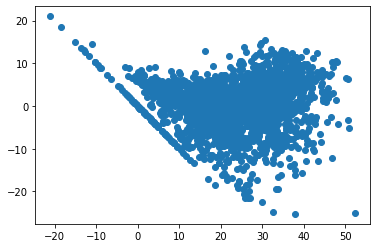

In [190]:
#checking for heteroscadacity
plt.scatter((Y_pred_test),(y_test)-(Y_pred_test));

We can see negatively correlated plot.

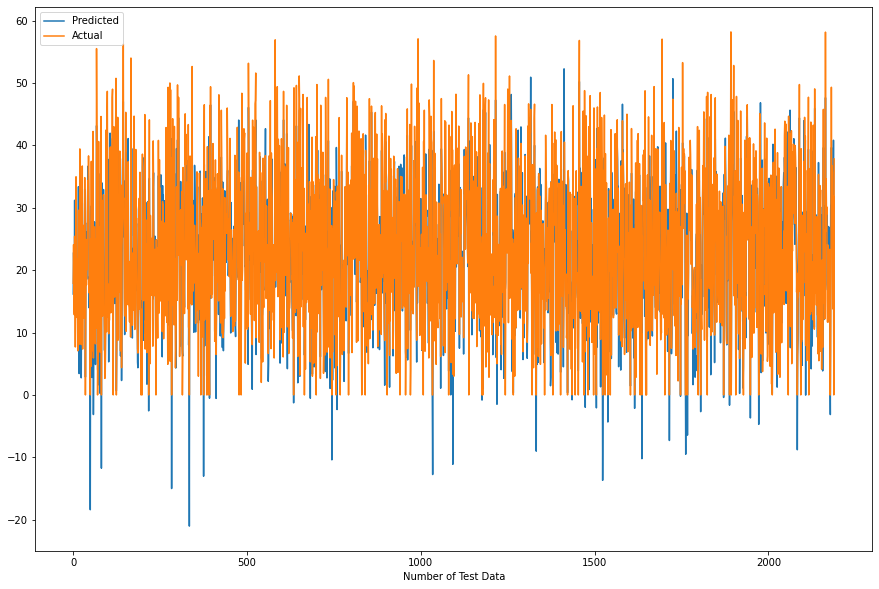

In [191]:
plt.figure(figsize=(15,10))
plt.plot(Y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel("Number of Test Data")
plt.show()

## **Lasso Regression**

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination

In [192]:
#fitting lasso model
from sklearn.linear_model import Lasso
las=Lasso(alpha=1.0,max_iter=3000)
las.fit(X_train,Y_train)
print(las.score(X_test,y_test),las.score(X_train,Y_train))

0.3873692800799008 0.40519624904934015


In [193]:
#getting X train test value
Y_pred_train_las=las.predict(X_train)
Y_pred_test_las=las.predict(X_test)

In [194]:
from sklearn.metrics import mean_squared_error
MSE_lin=mean_squared_error(Y_train,Y_pred_train_las)
print("MSE:",MSE_lin)
RMSE_lin=np.sqrt(MSE_lin)
print("RMSE:",RMSE_lin)
MAE_lin=mean_absolute_error(Y_train,Y_pred_train_las)
print("MAE:",MAE_lin)

from sklearn.metrics import r2_score
r2_lin=r2_score(Y_train,Y_pred_train_las)
print("R2 :",r2_lin)
adjusted_R2_lin=(1-(1-r2_score((Y_train),(Y_pred_train_las)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("adjusted R2:",1-(1-r2_score((Y_train),(Y_pred_train_las)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE: 91.59423336097032
RMSE: 9.570487623991283
MAE: 7.255041571454952
R2 : 0.40519624904934015
adjusted R2: 0.3921449996120475


We can see r2 value is 0.40 that means not well capable of data variance.

In [195]:
#storing value for future calc
dict1={"Model":"Lasso regression",
      "MAE":round((MAE_lin),3),
      "MSE":round((MSE_lin),3),
      "RMSE":round((RMSE_lin),3),
      "R2_score":round((r2_lin),3),
      "adjusted R2":round((adjusted_R2_lin),2)
      }
train_df=train_df.append(dict1,ignore_index=True)

In [196]:

from sklearn.metrics import mean_squared_error
MSE_lin=mean_squared_error(y_test,Y_pred_test_las)
print("MSE:",MSE_lin)
RMSE_lin=np.sqrt(MSE_lin)
print("RMSE:",RMSE_lin)
MAE_lin=mean_absolute_error(y_test,Y_pred_test_las)
print("MAE:",MAE_lin)

from sklearn.metrics import r2_score
r2_lin=r2_score((y_test),(Y_pred_test_las))
print("R2 :",r2_lin)
adjusted_R2_lin=(1-(1-r2_score((y_test),(Y_pred_test_las)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("adjusted R2:",1-(1-r2_score((y_test),(Y_pred_test_las)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 96.7750714044618
RMSE: 9.837432155011886
MAE: 7.455895061963607
R2 : 0.3873692800799008
adjusted R2: 0.37392686932535146


We can see r2 value is 0.38,so it is not capable of data variance.

In [197]:
dict2={"Model":"Lasso regression",
      "MAE":round((MAE_lin),3),
      "MSE":round((MSE_lin),3),
      "RMSE":round((RMSE_lin),3),
      "R2_score":round((r2_lin),3),
      "adjusted R2":round((adjusted_R2_lin),2)
      }
test_df=pd.DataFrame(dict2,index=[1])

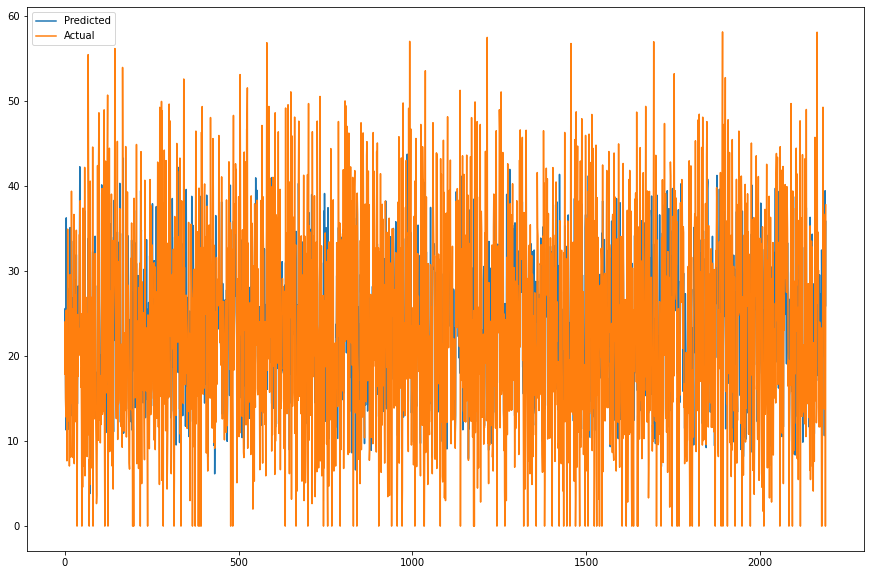

In [198]:
plt.figure(figsize=(15,10))
plt.plot(np.array(Y_pred_test_las))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

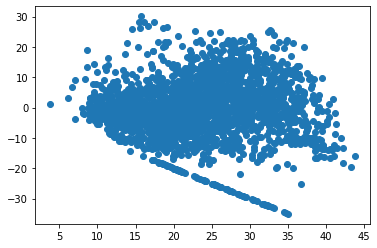

In [199]:
#checking heteroscadacity
plt.scatter((Y_pred_test_las),(y_test-Y_pred_test_las))


## **Ridge Regression**

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.

In [200]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

In [201]:
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [202]:
ridge.score(X_train,Y_train)

0.7722100789802107

In [203]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [205]:
from sklearn.metrics import mean_squared_error
MSE_linr=mean_squared_error(Y_train,y_pred_train_ridge)
print("MSE:",MSE_linr)
RMSE_linr=np.sqrt(MSE_linr)
print("RMSE:",RMSE_linr)
MAE_linr=mean_absolute_error(Y_train,y_pred_train_ridge)
print("MAE:",MAE_linr)
from sklearn.metrics import r2_score
r2_linr=r2_score(Y_train,y_pred_train_ridge)
print("R2 :",r2_linr)
adjusted_R2_linr=(1-(1-r2_score((Y_train),(y_pred_train_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("adjusted R2:",1-(1-r2_score((Y_train),(y_pred_train_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 35.07752456136463
RMSE: 5.922628180239296
MAE: 4.474125776125378
R2 : 0.7722100789802107
adjusted R2: 0.7672118874358922


We can see r2 value is 0.77 i.e., it is capable enough.

In [206]:
#storing the values
dict1={"Model":"Ridge regression",
      "MAE":round((MAE_linr),3),
      "MSE":round((MSE_linr),3),
      "RMSE":round((RMSE_linr),3),
      "R2_score":round((r2_linr),3),
      "adjusted R2":round((adjusted_R2_linr),2)
      }
train_df=train_df.append(dict1,ignore_index=True)


In [207]:
from sklearn.metrics import mean_squared_error
MSE_linr=mean_squared_error(y_test,y_pred_test_ridge)
print("MSE:",MSE_linr)
RMSE_linr=np.sqrt(MSE_linr)
print("RMSE:",RMSE_linr)
MAE_linr=mean_absolute_error(y_test,y_pred_test_ridge)
print("MAE:",MAE_linr)

from sklearn.metrics import r2_score
r2_linr=r2_score((y_test),(y_pred_test_ridge))
print("R2 :",r2_linr)
adjusted_R2_linr=(1-(1-r2_score((y_test),(y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("adjusted R2:",1-(1-r2_score((y_test),(y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 33.27678426818438
RMSE: 5.768603320404722
MAE: 4.410414932539515
R2 : 0.7893426477812578
adjusted R2: 0.7847203809491939


We can see r2 value is 0.78, it is performing good compared previous models.

In [ ]:
#store valiues
dict2={"Model":"Ridge regression",
      "MAE":round((MAE_linr),3),
      "MSE":round((MSE_linr),3),
      "RMSE":round((RMSE_linr),3),
      "R2_score":round((r2_linr),3),
      "adjusted R2":round((adjusted_R2_linr),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

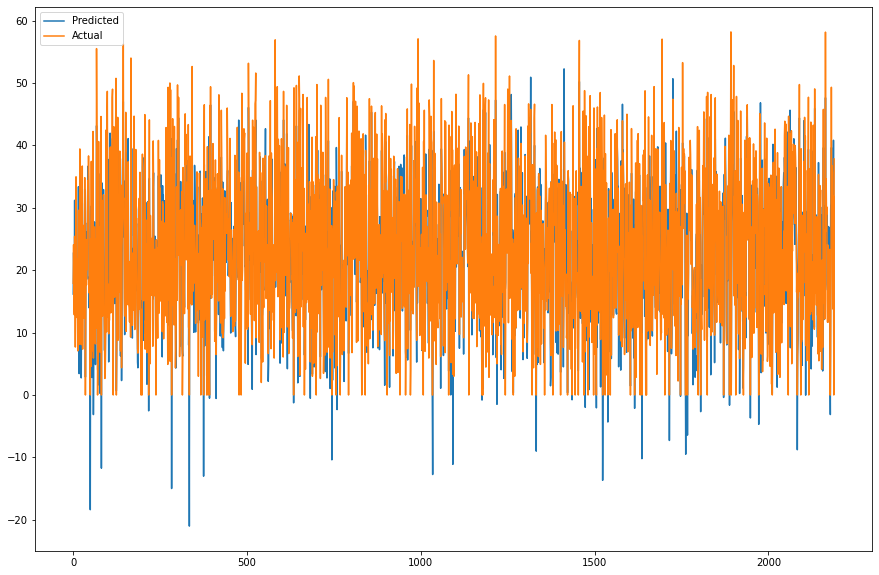

In [208]:
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_ridge))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

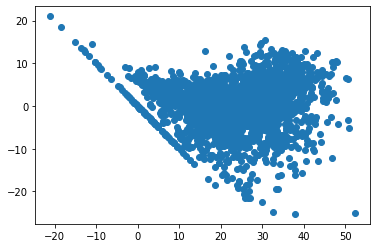

In [210]:
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge));

We can see it is negatively correlated

## **Elastic Net Regression**

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models

In [213]:
from sklearn.linear_model import ElasticNet
elasticregr=ElasticNet(alpha=0.1,l1_ratio=0.5)

In [214]:
elasticregr.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [215]:
elasticregr.score(X_train,Y_train)

0.6261189054494012

In [216]:
y_pred_train_elasticregr=elasticregr.predict(X_train)
y_pred_test_elasticregr=elasticregr.predict(X_test)

In [217]:
from sklearn.metrics import mean_squared_error
MSE_liner=mean_squared_error(Y_train,y_pred_train_elasticregr)
print("MSE:",MSE_liner)
RMSE_liner=np.sqrt(MSE_liner)
print("RMSE:",RMSE_liner)
MAE_liner=mean_absolute_error(Y_train,y_pred_train_elasticregr)
print("MAE:",MAE_liner)
from sklearn.metrics import r2_score
r2_liner=r2_score(Y_train,y_pred_train_elasticregr)
print("R2 :",r2_liner)
adjusted_R2_liner=(1-(1-r2_score((Y_train),(y_pred_train_elasticregr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("adjusted R2:",1-(1-r2_score((Y_train),(y_pred_train_elasticregr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 57.5742035398887
RMSE: 7.587766703048315
MAE: 5.792276538970546
R2 : 0.6261189054494012
adjusted R2: 0.6179151652795234


We can observe r2 value is 0.62, it is capable of data variance.

In [218]:
#storing the values
dict1={"Model":"Elastic Net regression",
      "MAE":round((MAE_liner),3),
      "MSE":round((MSE_liner),3),
      "RMSE":round((RMSE_liner),3),
      "R2_score":round((r2_liner),3),
      "adjusted R2":round((adjusted_R2_liner),2)
      }
train_df=train_df.append(dict1,ignore_index=True)


In [219]:
from sklearn.metrics import mean_squared_error
MSE_liner=mean_squared_error(y_test,y_pred_test_elasticregr)
print("MSE:",MSE_liner)
RMSE_liner=np.sqrt(MSE_liner)
print("RMSE:",RMSE_liner)
MAE_liner=mean_absolute_error(y_test,y_pred_test_elasticregr)
print("MAE:",MAE_liner)

from sklearn.metrics import r2_score
r2_liner=r2_score((y_test),(y_pred_test_elasticregr))
print("R2 :",r2_liner)
adjusted_R2_liner=(1-(1-r2_score((y_test),(y_pred_test_elasticregr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("adjusted R2:",1-(1-r2_score((y_test),(y_pred_test_elasticregr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 59.45120536350042
RMSE: 7.710460775044538
MAE: 5.873612334800099
R2 : 0.6236465216363589
adjusted R2: 0.6153885321484546


We can see r2 value is 0.62

In [221]:
#store valiues
dict2={"Model":"Elastic nNet regression",
      "MAE":round((MAE_liner),3),
      "MSE":round((MSE_liner),3),
      "RMSE":round((RMSE_liner),3),
      "R2_score":round((r2_liner),3),
      "adjusted R2":round((adjusted_R2_liner),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

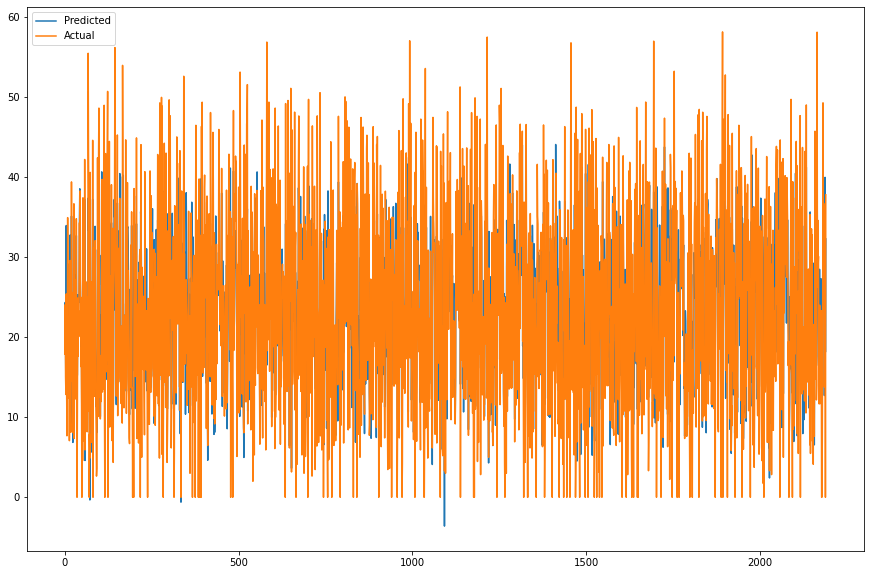

In [222]:
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_elasticregr))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

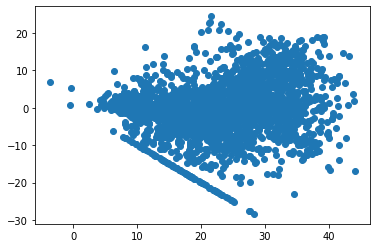

In [224]:
plt.scatter((y_pred_test_elasticregr),(y_test)-(y_pred_test_elasticregr));

# **Evaluation Summary**

In [225]:
train_df

,Model,MAE,MSE,RMSE,R2_score,adjusted R2
0,Linear regression,4.410,33.275,5.768,0.772,0.78
1,Lasso regression,7.255,91.594,9.570,0.405,0.39
2,Ridge regression,4.474,35.078,5.923,0.772,0.77
3,Elastic Net regression,5.792,57.574,7.588,0.626,0.62


We can see linear regression's r2 value is more compared to other, so that model is more capabale of data variance. 